In this additional Notebook, we explore the accuracy of CNNs algorithms

The running platform is google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Dataset
!ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Dataset
box_wordcount.png	   Datasetfinal.csv    mushrooms_sample.csv
catboost_info		   df_holdout.csv.csv  personality_data.csv
clean_data_1.csv	   final_model.h5      personality_data.csv.csv
clean_data_2.csv	   final_model.sav     preprocess.p
clean_data_3.csv	   fish.csv	       tfidf_vectorized_data.csv
count_vectorized_data.csv  insurance.csv       tokenizer.pickle
DataBase_MBTI.csv	   mbti_1.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import spacy
import re
from pprint import pprint
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('DataBase_MBTI.csv')
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


#### EDA

Average post length:  7234.98962536023


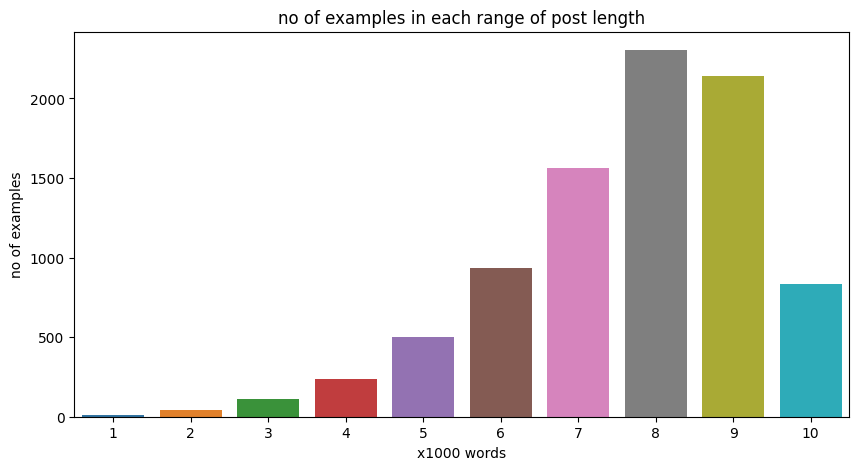

In [ ]:
posts_len = data['posts'].apply(len)
ranges = pd.cut(posts_len, 10, labels=np.arange(1, 11)) 
cnt = ranges.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=cnt.index, y=cnt.values)
plt.xlabel('x1000 words')
plt.ylabel('no of examples')
plt.title('no of examples in each range of post length')

print('Average post length: ', posts_len.mean()) 

cleaning up the post column

In [ ]:
def replace_symbols(text):
    text = re.sub('\|\|\|', ' ', text)
    text = re.sub('https?\S+', '<URL>', text)
    return text

data['cleaned_posts'] = data['posts'].apply(replace_symbols)

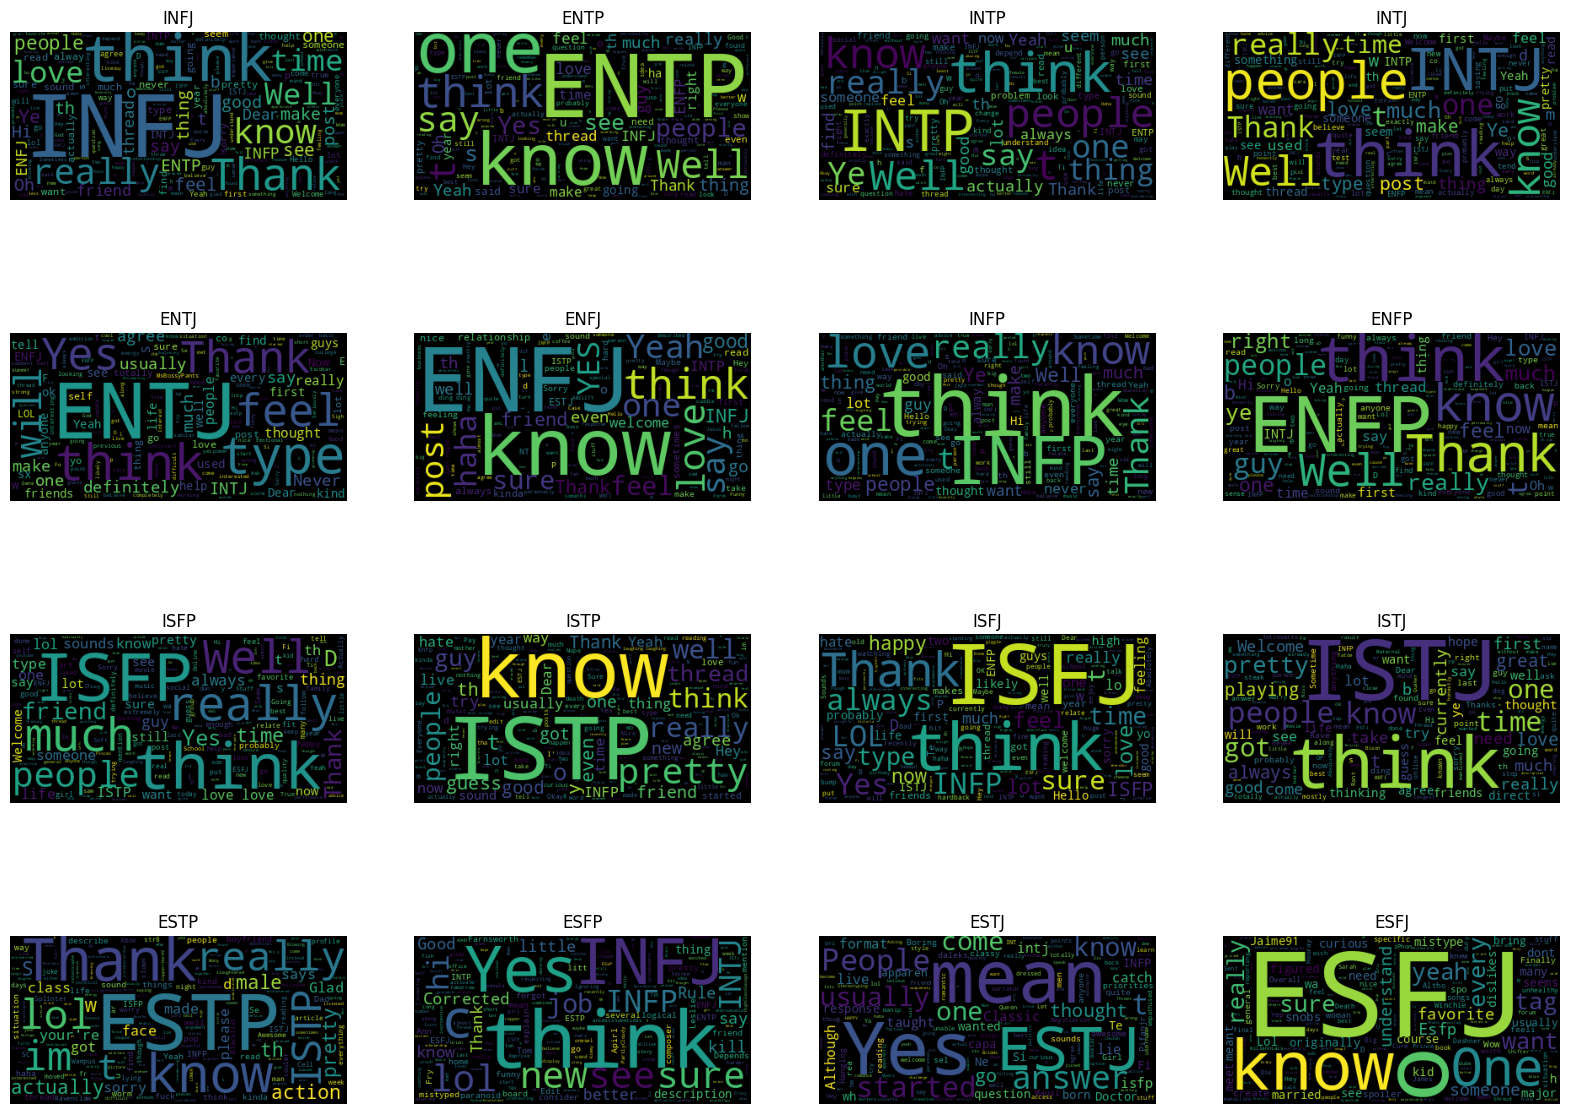

In [ ]:
from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('URL') # words to not consider
labels = data['type'].unique()
row, col = 4, 4
wc = WordCloud(stopwords=STOPWORDS)

fig, ax = plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        cur_type = labels[i*col+j]
        cur_ax = ax[i][j]
        df = data[data['type'] == cur_type]
        wordcloud = wc.generate(df['cleaned_posts'].to_string())
        cur_ax.imshow(wordcloud)
        cur_ax.axis('off')
        cur_ax.set_title(cur_type)

#### prepare data for training

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [ ]:
type_enc = LabelEncoder()
type_enc.fit(data['type'])
type_enc.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenizer(text): 
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc 
              if not (token.is_stop or token.is_digit or token.is_quote or token.is_space
                     or token.is_punct or token.is_bracket)]    
    return tokens

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

CNNs

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
X = tfidf.fit_transform(data['cleaned_posts']).toarray()
Y = type_enc.transform(data['type'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
def get_inp_fn(dataset, targets, num_epochs=None, shuffle=True):
    return tf.estimator.inputs.numpy_input_fn(
        x={'x': dataset},
        y=np.array(targets).astype(np.int32),
        num_epochs=num_epochs,
        shuffle=shuffle
    )

feature_cols = [tf.feature_column.numeric_column('x', shape=[5000])]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
clf = tf.estimator.DNNClassifier(
    feature_columns=feature_cols,
    hidden_units=[1024, 512],
    n_classes=16,
    optimizer='Adam',
    dropout=0.2
)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
clf.train(input_fn=get_inp_fn(X_train, Y_train), steps=2000)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions

In [ ]:
result = clf.evaluate(input_fn=get_inp_fn(X_train, Y_train, 1, False))
print('Train set evaluation:')
pprint(result)

result = clf.evaluate(input_fn=get_inp_fn(X_test, Y_test, 1, False))
print('Test set evaluation:')
pprint(result)

Instructions for updating:
Use tf.keras instead.


Train set evaluation:
{'accuracy': 0.8920996,
 'average_loss': 0.4572154,
 'global_step': 2000,
 'loss': 58.32634}
Test set evaluation:
{'accuracy': 0.46058092,
 'average_loss': 2.8782222,
 'global_step': 2000,
 'loss': 367.2273}


From the results, CNNs are not suitable for this project, as their accuracy is even less than 50%